In [24]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import norm
import seaborn as sns
from scipy import stats
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
print("Library")

Library


In [25]:
import os
#os.getcwd()
os.chdir('C:/Users/asus1/Desktop/bootcamp')
#reading data
veri=pd.read_csv('hmelq.csv')
veri.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [26]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [27]:
veri=veri.dropna()
veri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


In [28]:
# Kategorik değişkenler için dummies oluşturalım
dms=pd.get_dummies(veri[['reason', 'job']])
dms.head()

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,1,0,1,0,0,0,0,0
154,1,0,1,0,0,0,0,0
155,1,0,1,0,0,0,0,0
156,0,1,1,0,0,0,0,0
157,1,0,1,0,0,0,0,0


In [33]:
n_veri = veri.drop(["reason","job"],axis=1)
n_veri.head()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [34]:
veri = pd.concat([n_veri, dms[["reason_DebtCon","reason_HomeImp","job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","job_Self"]]],axis = 1)
veri.head()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,0,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,0
154,0,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,0
155,0,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,0
156,0,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,1,0,0,0,0,0
157,0,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,1,0,0,0,0,0


In [35]:
##Bad'lerin sayısını bulduk
veri["bad"].value_counts()

0    1840
1     178
Name: bad, dtype: int64

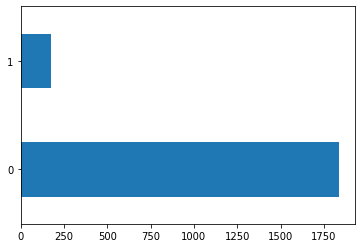

In [36]:
veri["bad"].value_counts().plot.barh()

In [37]:
y=veri["bad"]
X=veri.drop(["bad"],axis=1)

In [39]:
## Lojistik regresyon yapalım 
import statsmodels.api as sm
loj=sm.Logit(y,X)
loj_model=loj.fit()
loj_model.summary()

# Logistic regresyon modeline bakıldığında 
# derog,delinq,clage,ninq,clno ve debtinc'in anlamlı olduğu söylenir

Optimization terminated successfully.
         Current function value: 0.228362
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2001
Method:                           MLE   Df Model:                           16
Date:                Mon, 23 Sep 2019   Pseudo R-squ.:                  0.2346
Time:                        23:52:13   Log-Likelihood:                -460.84
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 1.039e-50
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -1.73e-05   1.05e-05     -1.640      0.101    -3.8e-05    3.37e-06
mortdue        -4.777e-06   4.76e-06     -1.004      0.315   -1.41e-05    4.55e-06
value           4.089e-06   4.06e-06      1.006      0.314   -3.87e-06    1.21e-05
yoj               -0.0109      0.013     -0.854      0.393      -0.036       0.014
derog              0.5708      0.130      4.382      0.000       0.315       0.826
delinq             0.7985      0.095      8.448      0.000       0.613       0.984
clage             -0.0046      0.001     -3.354      0.001      -0.007      -0.002
ninq               0.1119      0.049      2.303      0.021       0.017       0.207
clno              -0.0286      0.011     -2.627      0.009      -0.050      -0.007
debtinc            0.1143      0.014      8.222      0.000       0.087       0.142
reason_DebtCon    -3.7938   2.64e+07  -1.44e-07      1.000   -5.17e+07    5.17e+07
reason_HomeImp    -3.8593   2.64e+07  -1.46e-07      1.000   -5.17e+07    5.17e+07
job_Mgr           -1.4722   2.64e+07  -5.58e-08      1.000   -5.17e+07    5.17e+07
job_Office        -2.0716   2.64e+07  -7.86e-08      1.000   -5.17e+07    5.17e+07
job_Other         -1.5260   2.64e+07  -5.79e-08      1.000   -5.17e+07    5.17e+07
job_ProfEx        -1.5377   2.64e+07  -5.83e-08      1.000   -5.17e+07    5.17e+07
job_Sales         -0.2487   2.64e+07  -9.43e-09      1.000   -5.17e+07    5.17e+07
job_Self          -0.7970   2.64e+07  -3.02e-08      1.000   -5.17e+07    5.17e+07
==================================================================================
"""

In [142]:
#scikit learn ile logistic regresyon kuralım
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
loj=LogisticRegression(solver = "liblinear")
##lojistik regresyon kursun
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
y_pred=loj_model.predict(X)

In [144]:
pr=confusion_matrix(y,y_pred)
pr
## 1840 tane 0 var, modelim 2013 tane bulmus (1835+178)
## 178 tane 1 var, modelim 5 tane bulmuş (5+0)

array([[1835,    5],
       [ 178,    0]], dtype=int64)

In [145]:
accuracy_score(y,y_pred)
#accuracy çok yüksek ama sensitivity ile specificity bakmak gerekir

0.9093161546085233

In [146]:
###elle girelim
TN = pr[0][0]
FP = pr[0][1]
FN = pr[1][0]
TP = pr[1][1]
n=len(veri) 


In [147]:
###elle girelim
acc = (TP + TN)/n
mis_rate=(FP+FN)/n
precision_rate1 = (TP)/(TP+FP)
precision_rate0 = (TN)/(TN+FN)
print("Accuracy: " , acc)
print("Mis Rate: ", mis_rate)
print("Precision Rate (1): ", precision_rate1)
print("Precision Rate (0): ", precision_rate0)

Accuracy:  0.9093161546085233
Mis Rate:  0.09068384539147671
Precision Rate (1):  0.0
Precision Rate (0):  0.9115747640337805


Bakıldığında modelim 1 leri tahmin etmede hiç hassas değil 0 ları iyi öğrenmiş sadece diyebilirim!

In [148]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1840
           1       0.00      0.00      0.00       178

    accuracy                           0.91      2018
   macro avg       0.46      0.50      0.48      2018
weighted avg       0.83      0.91      0.87      2018



Rapora bakıldığında da modelimin sadece 0 lar için iyi çalıştığını söyleyebilirim, 1 ler için precision
0.00 çıkmıştır.  

In [149]:
loj_model.predict(X)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [150]:
loj_model.predict_proba(X)[0:10]
# 0 olma olasılığı 1 olma olasılığı

array([[0.94378703, 0.05621297],
       [0.82295558, 0.17704442],
       [0.98250686, 0.01749314],
       [0.83375945, 0.16624055],
       [0.85176979, 0.14823021],
       [0.97589329, 0.02410671],
       [0.83935067, 0.16064933],
       [0.96791113, 0.03208887],
       [0.76821404, 0.23178596],
       [0.95386306, 0.04613694]])

In [169]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]
y_probs[0:10]

array([0.05621297, 0.17704442, 0.01749314, 0.16624055, 0.14823021,
       0.02410671, 0.16064933, 0.03208887, 0.23178596, 0.04613694])

In [170]:
from sklearn.metrics import roc_auc_score,roc_curve
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
logit_roc_auc 

0.4986413043478261

In [171]:
fpr,tpr,thresholds = roc_curve(y,loj_model.predict_proba(X)[:,1])
print("false positive rate: ", fpr[0:10])
print("true positive rate: ",tpr[0:10])
print("threshold: ",thresholds[0:10])

false positive rate:  [0.         0.00054348 0.00380435 0.00380435 0.0048913  0.0048913
 0.00597826 0.00597826 0.00706522 0.00706522]
true positive rate:  [0.         0.         0.         0.00561798 0.00561798 0.02247191
 0.02247191 0.02808989 0.02808989 0.03932584]
threshold:  [1.53618315 0.53618315 0.47634515 0.46766239 0.45658186 0.44811757
 0.40339186 0.40207364 0.37659032 0.37206732]


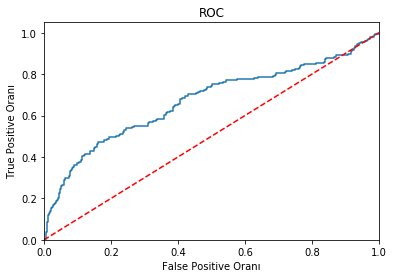

In [172]:
plt.figure()
plt.plot(fpr,tpr,label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [173]:
##şimdi o thresholdu 0.3 yapıp yeniden tahmin edelim
y_pred = [1 if i > 0.3 else 0 for i in y_probs]
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [174]:
confusion_matrix(y,y_pred)

array([[1817,   23],
       [ 157,   21]], dtype=int64)

In [175]:
accuracy_score(y,y_pred)

0.910802775024777

In [176]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1840
           1       0.48      0.12      0.19       178

    accuracy                           0.91      2018
   macro avg       0.70      0.55      0.57      2018
weighted avg       0.88      0.91      0.89      2018



Thresholdu 0.3 yapınca hem accuracy hem de precisionlarımız arttı

In [177]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.05621297, 0.17704442, 0.01749314, 0.16624055, 0.14823021])

In [178]:
from sklearn.metrics import roc_auc_score,roc_curve
logit_roc_auc = roc_auc_score(y_pred, loj_model.predict(X))
logit_roc_auc 

0.5568181818181818

In [179]:
fpr,tpr,thresholds = roc_curve(y,loj_model.predict_proba(X)[:,1])
print("false positive rate: ", fpr[0:10])
print("true positive rate: ",tpr[0:10])
print("threshold: ",thresholds[0:10])

false positive rate:  [0.         0.00054348 0.00380435 0.00380435 0.0048913  0.0048913
 0.00597826 0.00597826 0.00706522 0.00706522]
true positive rate:  [0.         0.         0.         0.00561798 0.00561798 0.02247191
 0.02247191 0.02808989 0.02808989 0.03932584]
threshold:  [1.53618315 0.53618315 0.47634515 0.46766239 0.45658186 0.44811757
 0.40339186 0.40207364 0.37659032 0.37206732]


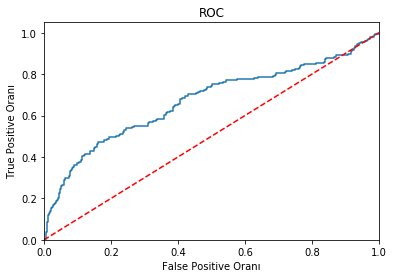

In [180]:
### en baştan curve eden ve sonra converge eden bir eğri bekliyorum ki grafiğin altında kalan 1e daha yakın olsun
plt.figure()
plt.plot(fpr,tpr,label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()